In [1]:
import numpy as np
import pandas as pd
import tools
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
digits = load_digits()
df = pd.DataFrame(digits.data)
# print(df.head())
df["target"] = digits.target
# df.to_csv("digits.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
Data Processing

In [10]:
y = digits.target
m = df.drop("target",axis=1).values

m = m.reshape(-1,2)
sc = StandardScaler()
m = sc.fit_transform(m)

In [11]:
kmeans = KMeans(n_clusters=10,init="k-means++",random_state=0)
n = kmeans.fit_predict(m)
labels = kmeans.labels_
labels

array([0, 7, 4, ..., 1, 3, 0])

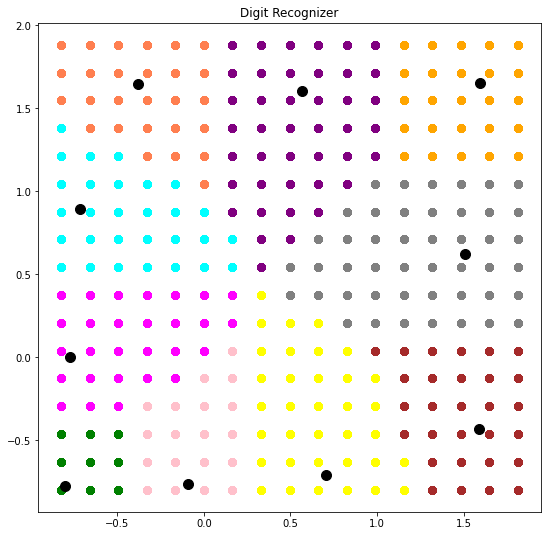

In [16]:
col = ["green","purple","brown","orange","yellow","cyan","magenta","coral","grey","pink"]
plt.figure(figsize=(9,9))
for i in range(0,10):
    for j in range(0,64):
        plt.scatter(m[n==i,0],m[n==i,1],s=50,c=col[i],label="Cluster"+str(i+1))
        
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroid")
plt.title("Digit Recognizer")
plt.show()